# Reconocimiento de Patrones en Imagenes - Clase 19

## Clasificador Inexperto de Bayes

In [1]:
import pandas as pd
#dataset tennis
data= {
    "Día": [1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "Clima": ["Soleado", "Soleado", "Cubierto", "Lluvia", "Lluvia", "Lluvia", "Cubierto", "Soleado", "Soleado", "Lluvia", "Soleado", "Cubierto", "Cubierto", "Lluvia"],
    "Temperatura": ["Calor", "Calor", "Calor", "Media", "Fria", "Fria", "Fria", "Media", "Fria", "Media", "Media", "Media", "Calor", "Media"],
    "Humedad": ["Alta", "Alta", "Alta", "Alta", "Normal", "Normal", "Normal", "Alta", "Normal", "Normal", "Normal", "Alta", "Normal", "Alta"],
    "Viento": ["Débil", "Fuerte", "Débil", "Débil", "Débil", "Fuerte", "Fuerte", "Débil", "Débil", "Débil", "Fuerte", "Fuerte", "Débil", "Fuerte"],
    "¿Juego Tenis?": ["NO", "NO", "SI", "SI", "SI", "NO", "SI", "NO", "SI", "SI", "SI", "SI", "SI", "NO"]
}

df = pd.DataFrame(data)

In [2]:
# clasificador inexpetro de bayes

# probabilidades previas
prior_yes = len(df[df["¿Juego Tenis?"] == "SI"]) / len(df)
prior_no = len(df[df["¿Juego Tenis?"] == "NO"]) / len(df)

def likelihood(feature, value, outcome):
    subset = df[df["¿Juego Tenis?"] == outcome]
    return len(subset[subset[feature] == value]) / len(subset) if len(subset) > 0 else 0

def predict(clima, temperatura, humedad, viento):
    likelihood_yes = (likelihood("Clima", clima, "SI") *
                      likelihood("Temperatura", temperatura, "SI") *
                      likelihood("Humedad", humedad, "SI") *
                      likelihood("Viento", viento, "SI"))
    
    likelihood_no = (likelihood("Clima", clima, "NO") *
                     likelihood("Temperatura", temperatura, "NO") *
                     likelihood("Humedad", humedad, "NO") *
                     likelihood("Viento", viento, "NO"))
    
    posterior_yes = likelihood_yes * prior_yes
    posterior_no = likelihood_no * prior_no
    
    if posterior_yes > posterior_no:
        return "SI"
    else:
        return "NO"
    
# Ejemplo de predicción
clima_input = "Soleado"
temperatura_input = "Media"
humedad_input = "Alta"
viento_input = "Débil"

resultado = predict(clima_input, temperatura_input, humedad_input, viento_input)
print(f"¿Se jugará tenis con Clima: {clima_input}, Temperatura: {temperatura_input}, Humedad: {humedad_input}, Viento: {viento_input}? Resultado: {resultado}")

¿Se jugará tenis con Clima: Soleado, Temperatura: Media, Humedad: Alta, Viento: Débil? Resultado: NO


In [3]:
datos = {
    "dia": [1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "clima": ["Soleado", "Soleado", "Cubierto", "Lluvia", "Lluvia", "Lluvia", "Cubierto", "Soleado", "Soleado", "Lluvia", "Soleado", "Cubierto", "Cubierto", "Lluvia"],
    "temperatura": ["Calor", "Calor", "Calor", "Media", "Fria", "Fria", "Fria", "Media", "Fria", "Media", "Media", "Media", "Calor", "Media"],
    "humedad": ["Alta", "Alta", "Alta", "Alta", "Normal", "Normal", "Normal", "Alta", "Normal", "Normal", "Normal", "Alta", "Normal", "Alta"],
    "viento": ["Débil", "Fuerte", "Débil", "Débil", "Débil", "Fuerte", "Fuerte", "Débil", "Débil", "Débil", "Fuerte", "Fuerte", "Débil", "Fuerte"],
    "juego_tenis": ["NO", "NO", "SI", "SI", "SI", "NO", "SI", "NO", "SI", "SI", "SI", "SI", "SI", "NO"]
}

dframe = pd.DataFrame(datos)

In [4]:
#Clasificador inexpetro de bayes con correccion de laplace

# probabilidades previas (con corrección de Laplace)
prior_yes = (len(dframe[dframe["juego_tenis"] == "SI"]) + 1) / (len(dframe) + 2)
prior_no = (len(dframe[dframe["juego_tenis"] == "NO"]) + 1) / (len(dframe) + 2)

def likelihood(feature, value, outcome):
    subset = dframe[dframe["juego_tenis"] == outcome]
    return (len(subset[subset[feature] == value]) + 1) / (len(subset) + len(dframe[feature].unique())) if len(subset) > 0 else 0

def predict(clima, temperatura, humedad, viento):
    likelihood_yes = (likelihood("clima", clima, "SI") *
                      likelihood("temperatura", temperatura, "SI") *
                      likelihood("humedad", humedad, "SI") *
                      likelihood("viento", viento, "SI"))

    likelihood_no = (likelihood("clima", clima, "NO") *
                     likelihood("temperatura", temperatura, "NO") *
                     likelihood("humedad", humedad, "NO") *
                     likelihood("viento", viento, "NO"))

    posterior_yes = likelihood_yes * prior_yes
    posterior_no = likelihood_no * prior_no
    
    if posterior_yes > posterior_no:
        return "SI"
    else:
        return "NO"
    
# Ejemplo de predicción
clima_input = "Soleado"
temperatura_input = "Media"
humedad_input = "Alta"
viento_input = "Débil"

resultado = predict(clima_input, temperatura_input, humedad_input, viento_input)
print(f"¿Se jugará tenis con Clima: {clima_input}, Temperatura: {temperatura_input}, Humedad: {humedad_input}, Viento: {viento_input}? Resultado: {resultado}")


¿Se jugará tenis con Clima: Soleado, Temperatura: Media, Humedad: Alta, Viento: Débil? Resultado: NO


## 

## clasificacion con NaiveBayes

Características:
- Dataset: Imagen con Letras
- Features: Momentos invariantes de Hu
- Validación Cruzada

Rendimiento promedio clasificador:0.7214285714285714


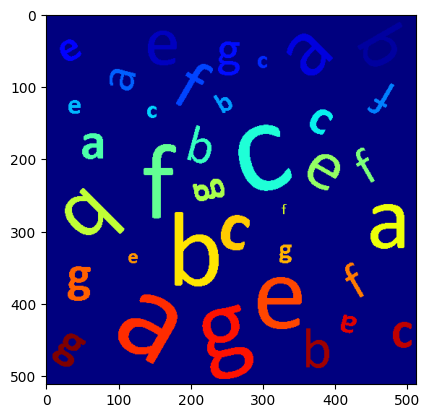

In [5]:
import cv2
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Leemos la imagen y la clase
img = cv2.imread('../IMG/sopa_letras.png')
clase = pd.read_csv('../IMG/clase_letras.csv')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = (gray< 1)*1

# transformamos la imagen en objetos y extraemos las estadísticas por region
regiones = label(bw)
sts = regionprops(label_image=regiones)
plt.figure()
plt.imshow(regiones, cmap='jet')

# extraemos los descriptores
data = []
cont = 1
for region in sts:
    xy= region.centroid
    hu = region.moments_hu
    data.append(hu)
    cont +=1

# construimos el dataset
X = np.vstack(data)

# print(X)
y = clase.to_numpy().ravel()

# Clasificador Naïve  Bayes
model = GaussianNB()

# k-cross validation
k_fold = KFold(n_splits=5 , shuffle=True, random_state=None)

#no necesario..obtener indices
indices = k_fold.split(X)

# evaluación del modelo
scores =  cross_val_score(model, X, y, cv=k_fold, n_jobs=1)
y_pred =  cross_val_predict(model, X, y, cv=k_fold, n_jobs=1)
print(f'Rendimiento promedio clasificador:{scores.mean()}')

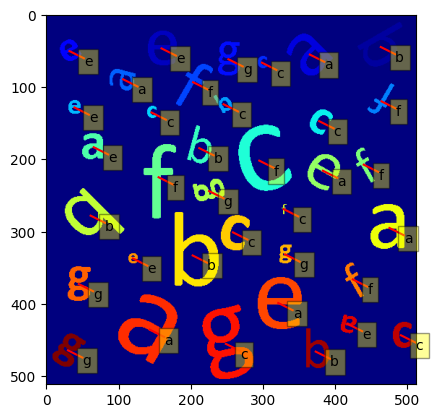

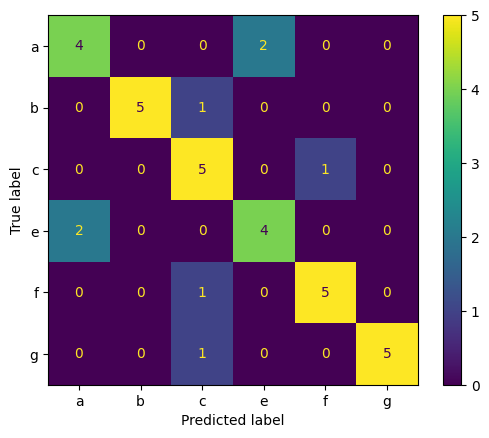

In [8]:
#resultados finales
plt.figure()
plt.imshow(regiones, cmap='jet')
letras ={0:'a', 1:'b', 2:'c', 3:'e', 4:'f', 5:'g'}
for region, clase in zip(sts, y_pred):
    xy= region.centroid
    plt.plot([xy[1],xy[1]+20], [xy[0],xy[0]+10], color='red')
    plt.text(xy[1]+20, xy[0]+20, f'{letras[clase]}', bbox=dict(facecolor='yellow', alpha=0.4))

# matriz de confusión
conf_mat = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['a', 'b', 'c', 'e', 'f', 'g'])
disp.plot()
plt.show()

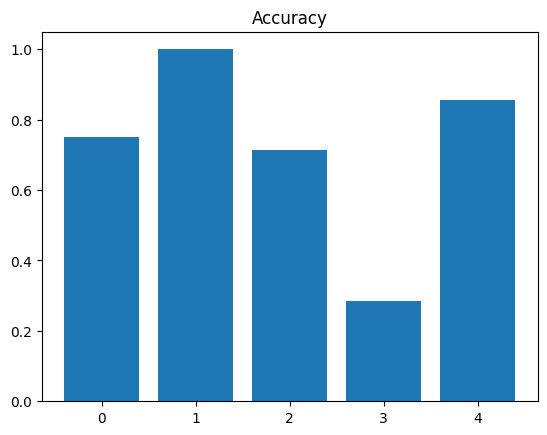

In [7]:
# graficos
plt.figure()
plt.bar(x=np.arange(len(scores)), height= scores)
plt.title('Accuracy')
plt.show()